In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


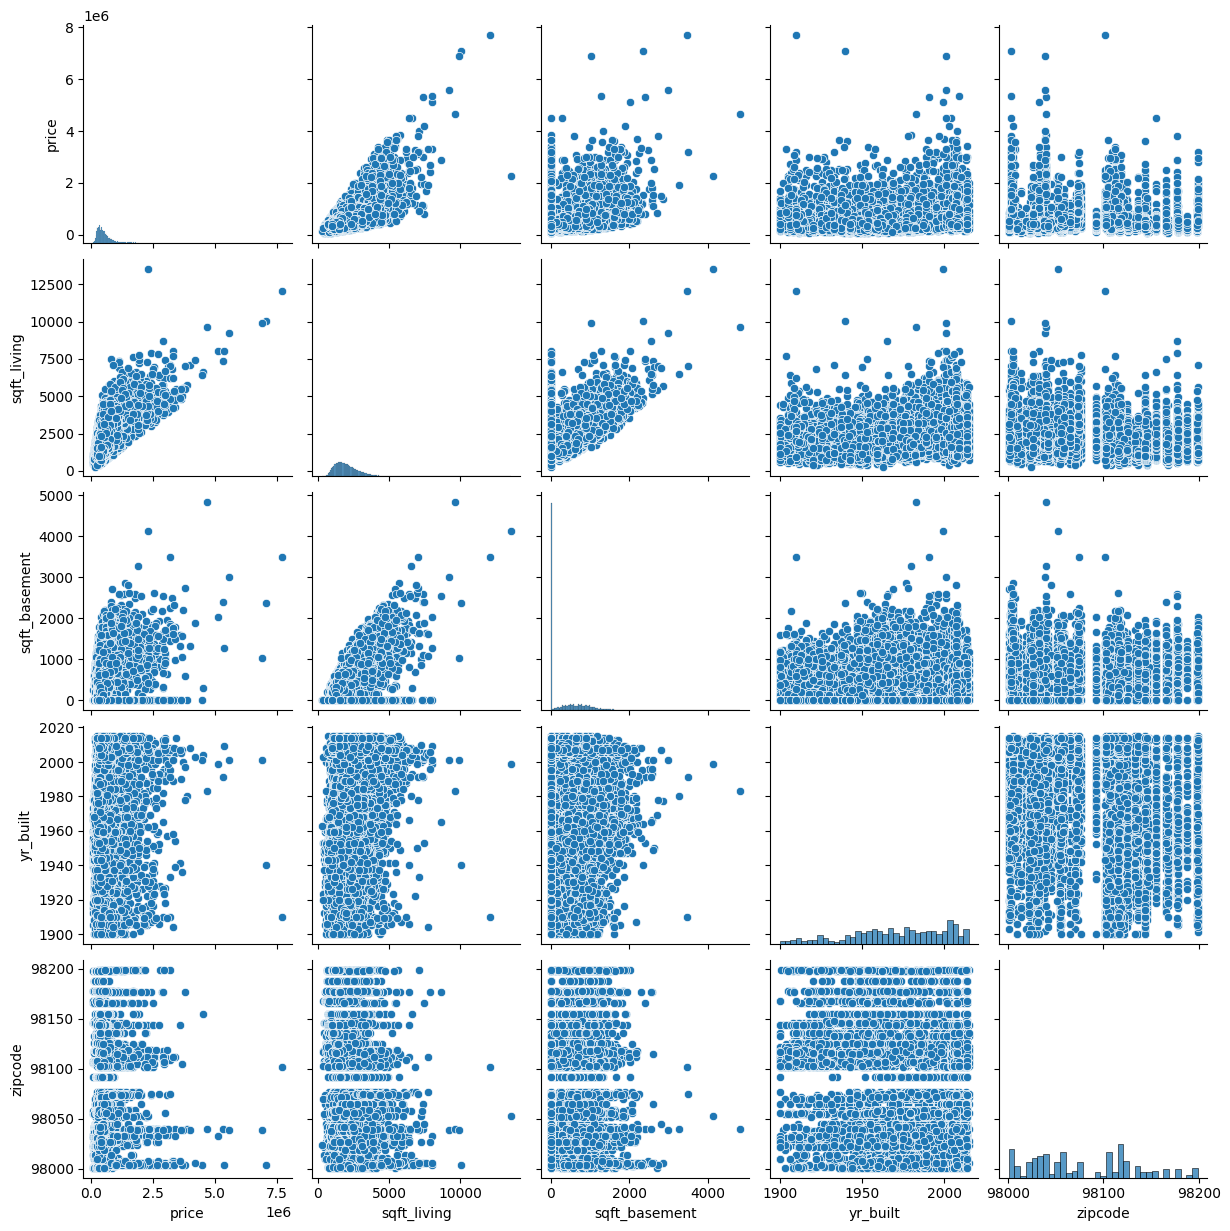

In [5]:
sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

In [6]:
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [7]:
print('train data개수: ', len(x_train))
print('test data개수: ', len(x_test))

train data개수:  15129
test data개수:  6484


In [8]:
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

LinearRegression()

In [9]:
y_predict = mreg.predict(x_test)

In [10]:
print(mreg.intercept_)
print(mreg.coef_)

[8539419.26199946]
[[-3.08063815e+04  3.62284333e+04  1.08895636e+02  2.05753978e-01
   9.66186713e+03  5.76371872e+05  5.23729823e+04  2.61584536e+04
   9.99139823e+04  6.56119737e+01  4.32836622e+01 -2.58166260e+03
   1.48810164e+01 -6.05730282e+02  6.05554230e+05 -2.16370099e+05
   2.07579282e+01 -4.13431041e-01]]


In [11]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.71
테스트셋 R-Square: 0.69


In [12]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2130.
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:09:00   Log-Likelihood:            -2.0596e+05
No. Observations:               15129   AIC:                         4.120e+05
Df Residuals:                   15111   BIC:                         4.121e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.539e+06   3.44e+06      2.479      0.013    1.79e+06    1.53e+07
bedrooms      -3.081e+04   2189.505    -14.070      0.000   -3.51e+04   -2.65e+04
bathrooms      3.623e+04   3805.456      9.520      0.000    2.88e+04    4.37e+04
sqft_living     108.8959      2.671     40.776      0.000     103.661     114.131
sqft_lot          0.2058      0.062      3.293      0.001       0.083       0.328
floors         9661.8671   4226.369      2.286      0.022    1377.672    1.79e+04
waterfront     5.764e+05   1.99e+04     28.919      0.000    5.37e+05    6.15e+05
view           5.237e+04   2497.902     20.967      0.000    4.75e+04    5.73e+04
condition      2.616e+04   2757.920      9.485      0.000    2.08e+04    3.16e+04
grade          9.991e+04   2519.465     39.657      0.000     9.5e+04    1.05e+05
sqft_above       65.6117      2.658     24.685      0.000      60.402      70.822
sqft_basement    43.2834      3.109     13.924      0.000      37.190      49.377
yr_built      -2581.6626     85.364    -30.243      0.000   -2748.987   -2414.338
yr_renovated     14.8810      4.201      3.543      0.000       6.647      23.115
zipcode        -605.7303     38.812    -15.607      0.000    -681.807    -529.653
lat            6.056e+05   1.27e+04     47.852      0.000    5.81e+05     6.3e+05
long          -2.164e+05   1.56e+04    -13.911      0.000   -2.47e+05   -1.86e+05
sqft_living15    20.7579      4.085      5.081      0.000      12.751      28.765
sqft_lot15       -0.4134      0.091     -4.530      0.000      -0.592      -0.235
==============================================================================
Omnibus:                    11425.228   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           712490.037
Skew:                           3.078   Prob(JB):                         0.00
Kurtosis:                      36.051   Cond. No.                     3.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

mreg_poly = LinearRegression(fit_intercept=True)

mreg_poly.fit(x_train_poly, y_train)

x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

In [14]:
print(mreg_poly.intercept_)
print(mreg_poly.coef_)

[2.02900703e+10]
[[ 1.41351929e+07 -1.19447823e+07  1.95800066e+03 -6.88830542e+02
  -3.89031868e+07  1.26253933e+08 -7.60084085e+06  3.78311083e+06
  -1.52971532e+07  2.94054727e+04 -3.22419117e+04  1.94750502e+04
   3.53035229e+04 -4.70882537e+05  1.24657664e+08  1.96180967e+06
  -9.46954127e+03  8.80918414e+02  8.46551731e+02  6.40078502e+03
   9.34141308e+02  8.34814473e-02  1.21533518e+04 -1.79414878e+04
   6.99851198e+03 -4.29613782e+03  3.60756223e+03 -9.57306051e+02
  -9.59627680e+02 -2.53052781e+02 -3.00633251e+00 -4.57411180e+01
  -2.48776254e+04  6.53778802e+04  8.60840549e+00 -7.83607012e-02
  -3.95012168e+03  3.15539892e+01 -7.88086613e-02 -2.73206034e+04
   8.69204194e+04 -8.25869181e+02 -1.03617195e+04  1.30353775e+04
  -1.49562505e+01  4.82474855e+01  3.46232724e+02 -3.56736205e+01
  -1.82559170e+01  4.96583672e+04 -8.72309757e+04 -1.92022153e+01
   2.40649634e-01 -8.05853478e+02  1.06646580e+03  3.56722110e+00
   1.62668642e+02 -1.67949627e+01  5.04717733e+00  3.875226

In [15]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.82
테스트셋 R-Square: 0.81


In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge001.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))

ridge_train R2: 0.706
ridge_test R2: 0.686
ridge001_train R2: 0.706
ridge001_test R2: 0.686
ridge100_train R2: 0.697
ridge100_test R2: 0.678


In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+14, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.670e+14, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(


lasso_train R2: 0.706
lasso_test R2: 0.686
num_of_IV: 18
lasso001_train R2: 0.706
lasso001_test R2: 0.686
num_of_IV: 18
lasso10000_train R2: 0.633
lasso10000_test R2: 0.618
num_of_IV: 12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.593e+14, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(


In [18]:
from sklearn.linear_model import ElasticNet

elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+14, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.595e+14, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(


elast_train R2: 0.624
lasso_test R2: 0.613
num_of_IV: 18
elast001_train R2: 0.546
elast001_test R2: 0.543
num_of_IV: 18
elast10000_train R2: 0.633
elast10000_test R2: 0.618
num_of_IV: 12


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.593e+14, tolerance: 2.010e+11
  model = cd_fast.enet_coordinate_descent(


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as pl

In [20]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [22]:
df2 = pd.get_dummies(df, columns = ['HeartDisease','Smoking',
                                    'AlcoholDrinking','Stroke',
                                    'DiffWalking','Sex',
                                    'AgeCategory','Race',
                                    'Diabetic','PhysicalActivity',
                                    'GenHealth','Asthma',
                                    'KidneyDisease','SkinCancer']
                     ,drop_first=True
                    )

df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [23]:
df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)
df3 = pd.concat([df_num2, df_nom], axis=1)
df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [24]:
X = df3.drop(['HeartDisease_Yes'], axis =1)
y = df3[['HeartDisease_Yes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  239846
test data 개수:  79949


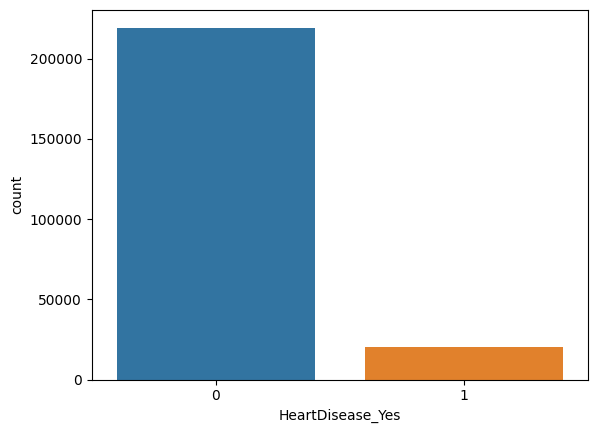

In [25]:
sns.countplot(x='HeartDisease_Yes', data=y_train)
plt.show()

In [26]:
X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
150901,1.476319,0.0,0.0,0.5,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
164527,-0.248985,15.0,10.0,-2.0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
260971,0.805142,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
262287,0.612991,5.0,0.0,0.0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [27]:
X_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (239846, 37) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (41036, 37) (41036, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 0    219328
1     20518
Name: y1, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 0    20518
1    20518
Name: y1, dtype: int64


In [28]:
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-0.572395,0.0,1.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,2.365359,6.0,0.333333,-0.5,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,-0.964817,0.0,2.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,-1.246279,0.0,0.000000,-0.5,1,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0.668471,15.0,0.000000,0.5,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [29]:
model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.7645482015791013


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print('테스트셋 모델 정확도:', model.score(X_test, y_test))

테스트셋 모델 정확도: 0.7501282067317915


In [31]:
print(model.coef_)

[[ 7.96741949e-02  1.19040059e-02  2.93683087e-02 -5.45777557e-02
   4.06138674e-01 -2.46681966e-01  1.28145793e+00  2.00082859e-01
   7.60125260e-01 -5.75608270e-02  3.97227687e-01  4.15870850e-01
   7.88107431e-01  1.07631950e+00  1.52854195e+00  1.76621716e+00
   2.04611402e+00  2.33252984e+00  2.68481381e+00  2.84144667e+00
   3.20273244e+00 -5.28888236e-01 -2.43582138e-01 -1.83591001e-01
  -9.67855773e-02 -5.99487947e-02  2.81274969e-01  4.80241334e-01
   4.37410508e-01 -1.96628211e-03  1.49938246e+00  1.02768816e+00
   1.81080181e+00  4.45417783e-01  2.94521018e-01  6.17176662e-01
   1.41492522e-01]]


In [32]:
model2 = sm.Logit(y_train_under, X_train_under)
results = model2.fit(method="newton")

results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41036
Model:                          Logit   Df Residuals:                    40999
Method:                           MLE   Df Model:                           36
Date:                Wed, 18 Oct 2023   Pseudo R-squ.:                     inf
Time:                        12:09:09   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0918      0.015      6.056      0.000       0.062       0.121
PhysicalHealth                       0.0114      0.003      3.367      0.001       0.005       0.018
MentalHealth                         0.0170      0.005      3.478      0.001       0.007       0.027
SleepTime                           -0.0733      0.016     -4.619      0.000      -0.104      -0.042
Smoking_Yes                          0.3696      0.025     14.807      0.000       0.321       0.419
AlcoholDrinking_Yes                 -0.2732      0.053     -5.107      0.000      -0.378      -0.168
Stroke_Yes                           1.2616      0.054     23.555      0.000       1.157       1.367
DiffWalking_Yes                      0.1708      0.035      4.907      0.000       0.103       0.239
Sex_Male                             0.6680      0.025     26.580      0.000       0.619       0.717
AgeCategory_25-29                   -1.4044      0.127    -11.088      0.000      -1.653      -1.156
AgeCategory_30-34                   -0.9200      0.103     -8.905      0.000      -1.122      -0.717
AgeCategory_35-39                   -0.9326      0.097     -9.634      0.000      -1.122      -0.743
AgeCategory_40-44                   -0.5486      0.089     -6.190      0.000      -0.722      -0.375
AgeCategory_45-49                   -0.2661      0.082     -3.244      0.001      -0.427      -0.105
AgeCategory_50-54                    0.1993      0.076      2.636      0.008       0.051       0.348
AgeCategory_55-59                    0.4354      0.072      6.049      0.000       0.294       0.576
AgeCategory_60-64                    0.7295      0.070     10.414      0.000       0.592       0.867
AgeCategory_65-69                    1.0211      0.070     14.680      0.000       0.885       1.157
AgeCategory_70-74                    1.3695      0.070     19.549      0.000       1.232       1.507
AgeCategory_75-79                    1.5302      0.073     20.958      0.000       1.387       1.673
AgeCategory_80 or older              1.8668      0.072     25.936      0.000       1.726       2.008
Race_Asian                          -2.6688      0.120    -22.307      0.000      -2.903      -2.434
Race_Black                          -2.3371      0.081    -28.721      0.000      -2.497      -2.178
Race_Hispanic                       -2.3334      0.080    -29.136      0.000      -2.490      -2.176
Race_Other                          -2.2070      0.093    -23.681      0.000      -2.390      -2.024
Race_White                          -2.1554      0.069    -31.379      0.000      -2.290      -2.021
Diabetic_No, borderline diabetes     0.2903      0.078      3.734      0.000       0.138       0.443
Diabetic_Yes                         0.4801      0.032     14.907      0.000       0.417       0.543
Diabetic_Yes (during pregnancy)      0.2256      0.164      1.376      0.169      -0.096       0.547
PhysicalA

In [33]:
np.exp(results.params)

BMI                                 1.096091
PhysicalHealth                      1.011469
MentalHealth                        1.017101
SleepTime                           0.929300
Smoking_Yes                         1.447148
AlcoholDrinking_Yes                 0.760970
Stroke_Yes                          3.530911
DiffWalking_Yes                     1.186292
Sex_Male                            1.950422
AgeCategory_25-29                   0.245524
AgeCategory_30-34                   0.398530
AgeCategory_35-39                   0.393534
AgeCategory_40-44                   0.577770
AgeCategory_45-49                   0.766331
AgeCategory_50-54                   1.220555
AgeCategory_55-59                   1.545532
AgeCategory_60-64                   2.074125
AgeCategory_65-69                   2.776307
AgeCategory_70-74                   3.933446
AgeCategory_75-79                   4.619038
AgeCategory_80 or older             6.467417
Race_Asian                          0.069335
Race_Black

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [37]:
df["Type_str"] = df["Type"].apply(str)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [38]:
df_x = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
df_y = df[['Type_str']]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=10)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  128
test data 개수:  86


In [41]:
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.5813953488372093

In [42]:
dt_model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,

              'importance' : dt_model.feature_importances_})

,feature,importance
0,RI,0.081766
1,Na,0.100296
2,Mg,0.320142
3,Al,0.198399
4,Si,0.122703
5,K,0.017020
6,Ca,0.133502
7,Ba,0.026172
8,Fe,0.000000


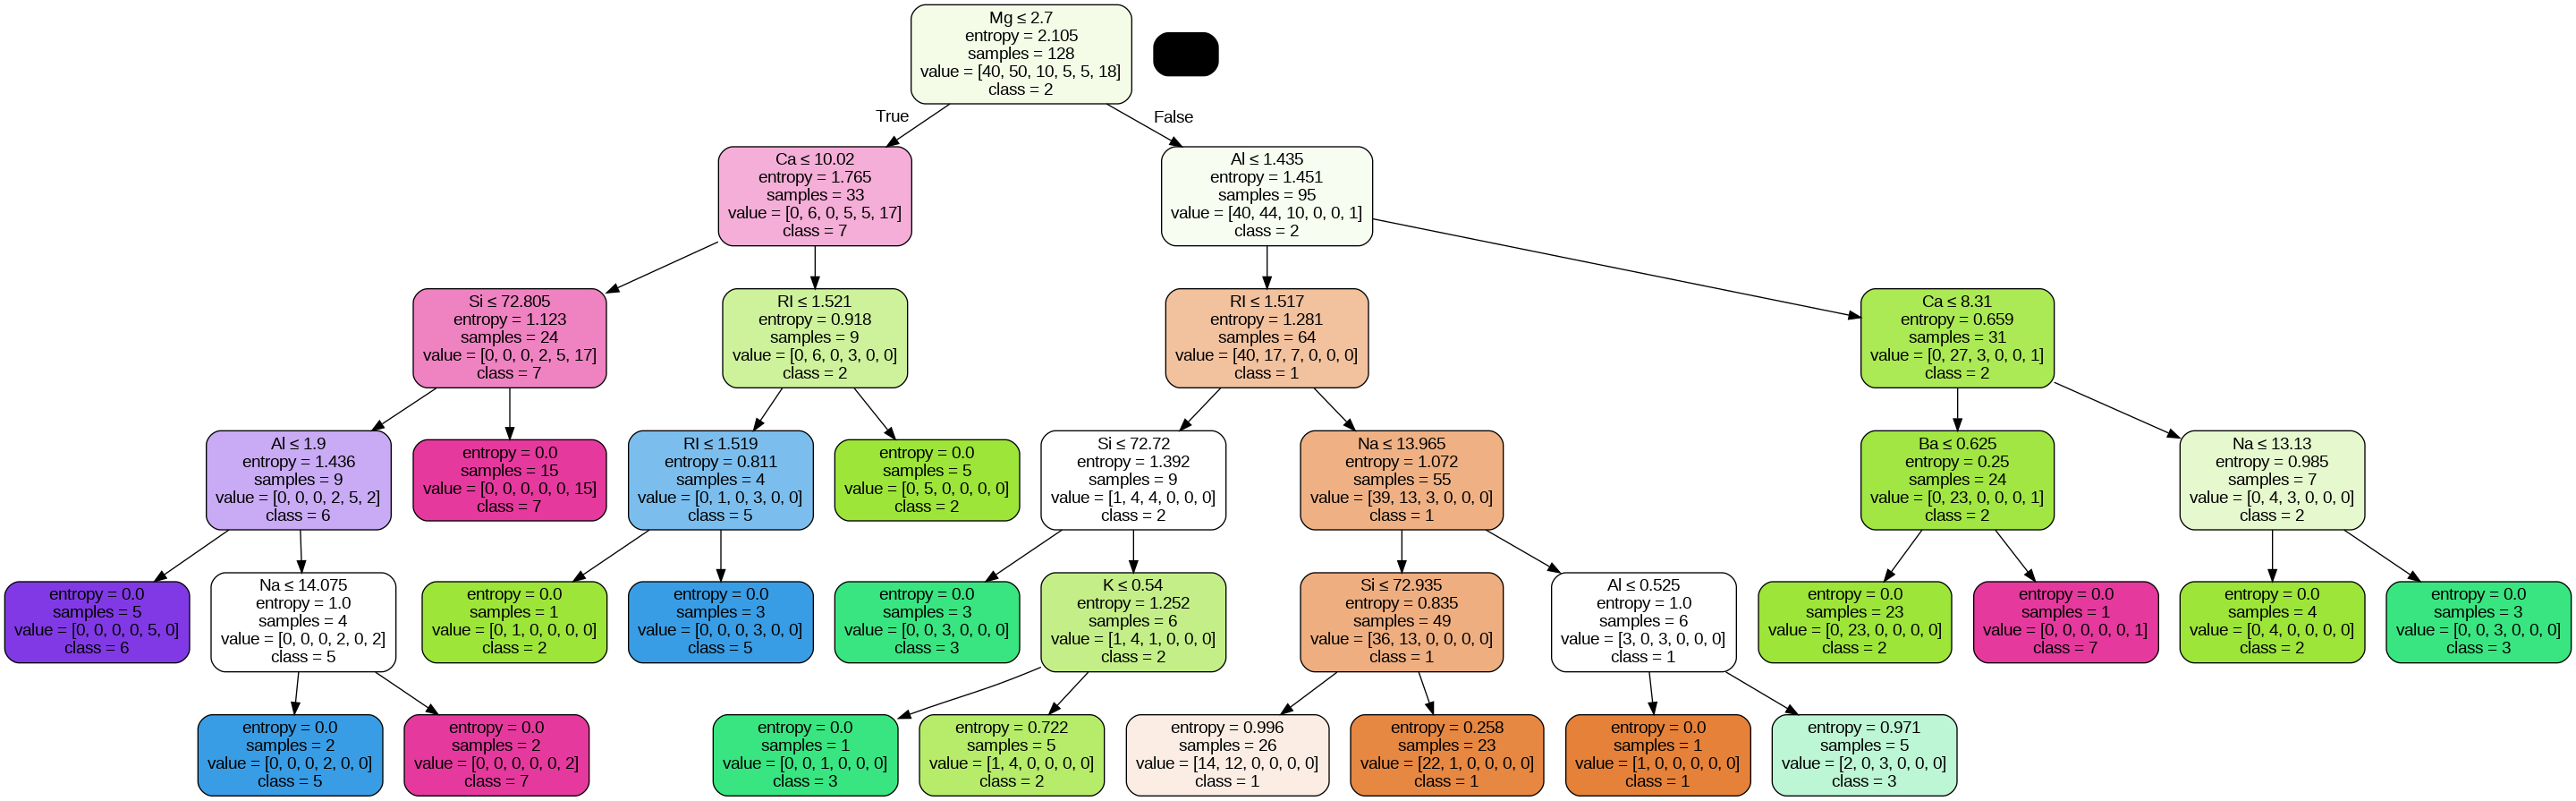

In [43]:
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=dt_model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [44]:
rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,
                                   bootstrap=True, class_weight=None, criterion='gini',
                                   max_features='auto', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_samples_leaf=1,
                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                   n_jobs=None, oob_score=False,  verbose=0,
                                   warm_start=False)

rnf_model.fit(x_train,y_train)

y_pred = rnf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

<ipython-input-44-91c6bb3a9c1f>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnf_model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7093023255813954


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.62      0.77      0.69        26
           3       0.67      0.29      0.40         7
           5       1.00      0.75      0.86         8
           6       0.50      0.25      0.33         4
           7       0.91      0.91      0.91        11

    accuracy                           0.71        86
   macro avg       0.73      0.62      0.65        86
weighted avg       0.72      0.71      0.70        86



In [46]:
feature_imp = pd.Series(rnf_model.feature_importances_,
                        index=x_train.columns).sort_values(ascending=False)
feature_imp[:20]

Al    0.159236
Ca    0.153955
Mg    0.148816
RI    0.140340
Na    0.107937
Ba    0.090783
K     0.079957
Si    0.072258
Fe    0.046717
dtype: float64

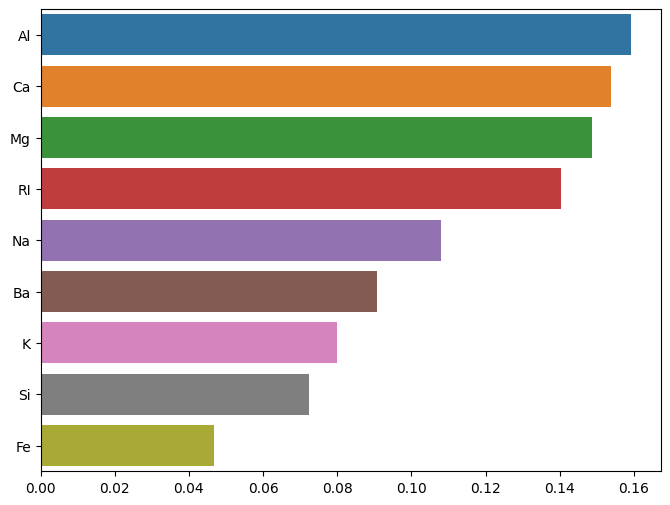

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("bodyPerformance.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [51]:
df_x = df.drop(['gender','age','class'],axis=1)
df_y = df[['gender']]

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [52]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.3,random_state=10)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  9375
test data 개수:  4018


In [53]:
LDA_1=LinearDiscriminantAnalysis(store_covariance=True)

LDA_1.fit(x_train, y_train)
y_train_pred=LDA_1.predict(x_train)
y_test_pred=LDA_1.predict(x_test)

print(accuracy_score(y_train, y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9784533333333333


In [54]:
print('Intercept: ', LDA_1.intercept_)
print('Coefficient: ', LDA_1.coef_)

Intercept:  [-14.29894437]
Coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-55-62216e1adff7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
<ipython-input-55-62216e1adff7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

<Axes: xlabel='lda_component'>

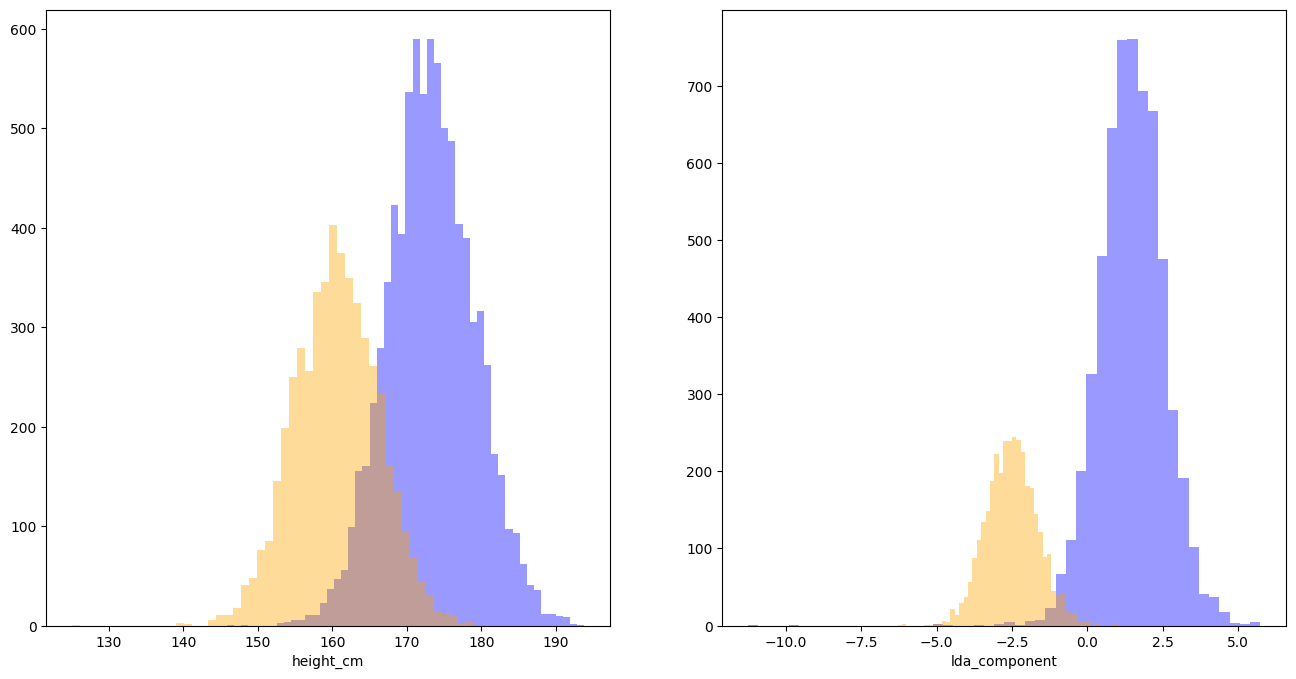

In [55]:
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com,columns=['lda_component'])

y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
             hist=True, kde=False, color="blue",
             label = 'man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'],
             hist=True, kde=False, color="orange",
             label = 'woman', ax=axs[0])

sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'],
             hist=True, kde=False, color="blue", label = 'man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'],
             hist=True, kde=False, color="orange", label = 'woman', ax=axs[1])

In [56]:
qda=QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train)
qda_y_train_pred=qda.predict(x_train)
qda_y_test_pred=qda.predict(x_test)


print(accuracy_score(y_train, qda_y_train_pred))
print(accuracy_score(y_test, qda_y_test_pred))

0.98048
0.9798407167745147


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018



In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.svm import SVC
import pandas as pd

In [59]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [67]:
df_x = df.drop(['Area','Class'],axis=1)
df_y = df[['Class']]

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=10)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [69]:
svm_model = SVC(kernel = 'linear', degree = 3, gamma = 'auto', C=10, max_iter = 1000)

svm_model.fit(x_train,y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test, y_test))

0.8648148148148148
0.8638888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
scores = []
for C_point in [*range(1,31)]:
    svc=SVC(kernel='rbf',C=C_point,max_iter = 1000)
    C_model=svc.fit(x_train, y_train)
    train_score = C_model.score(x_train, y_train)
    test_score = C_model.score(x_test, y_test)
    print("rbf SVM : C:{}, train set score:{:2f}, test set score:{:2f}".format
          (C_point,train_score, test_score))
    scores.append([train_score, test_score])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C:1, train set score:0.857407, test set score:0.883333
rbf SVM : C:2, train set score:0.864815, test set score:0.880556
rbf SVM : C:3, train set score:0.862963, test set score:0.886111
rbf SVM : C:4, train set score:0.861111, test set score:0.880556


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C:5, train set score:0.861111, test set score:0.880556
rbf SVM : C:6, train set score:0.862963, test set score:0.883333
rbf SVM : C:7, train set score:0.866667, test set score:0.883333
rbf SVM : C:8, train set score:0.864815, test set score:0.883333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C:9, train set score:0.864815, test set score:0.883333
rbf SVM : C:10, train set score:0.864815, test set score:0.891667
rbf SVM : C:11, train set score:0.864815, test set score:0.891667
rbf SVM : C:12, train set score:0.862963, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C:13, train set score:0.864815, test set score:0.891667
rbf SVM : C:14, train set score:0.864815, test set score:0.891667
rbf SVM : C:15, train set score:0.864815, test set score:0.897222


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C:16, train set score:0.864815, test set score:0.891667
rbf SVM : C:17, train set score:0.864815, test set score:0.891667
rbf SVM : C:18, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk

rbf SVM : C:19, train set score:0.864815, test set score:0.891667
rbf SVM : C:20, train set score:0.864815, test set score:0.891667
rbf SVM : C:21, train set score:0.864815, test set score:0.888889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk

rbf SVM : C:22, train set score:0.864815, test set score:0.883333
rbf SVM : C:23, train set score:0.864815, test set score:0.883333
rbf SVM : C:24, train set score:0.862963, test set score:0.886111
rbf SVM : C:25, train set score:0.861111, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sk

rbf SVM : C:26, train set score:0.861111, test set score:0.888889
rbf SVM : C:27, train set score:0.862963, test set score:0.888889
rbf SVM : C:28, train set score:0.861111, test set score:0.886111
rbf SVM : C:29, train set score:0.861111, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk

rbf SVM : C:30, train set score:0.861111, test set score:0.886111


In [71]:
scores = []
for gamma_point in [0.1,0.5,1,5,10,20]:
    svc=SVC(kernel='rbf',C=10,gamma=gamma_point,max_iter = 1000)
    model=svc.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print("rbf SVM : gamma:{}, train set score:{:2f}, test set score:{:2f}".format
          (gamma_point,train_score, test_score))
    scores.append([train_score, test_score])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : gamma:0.1, train set score:0.862963, test set score:0.866667
rbf SVM : gamma:0.5, train set score:0.864815, test set score:0.880556
rbf SVM : gamma:1, train set score:0.861111, test set score:0.877778
rbf SVM : gamma:5, train set score:0.862963, test set score:0.880556


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.w

rbf SVM : gamma:10, train set score:0.864815, test set score:0.883333
rbf SVM : gamma:20, train set score:0.879630, test set score:0.872222


In [ ]:
!pip install mglearn

In [73]:
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [75]:
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

x = pd.DataFrame(data=df_minmax, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [76]:
classifier = KNeighborsClassifier(n_neighbors = 3,
                                  weights='uniform',
                                  metric="minkowski")
classifier.fit(x_train, y_train)

print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.8925925925925926
0.8555555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

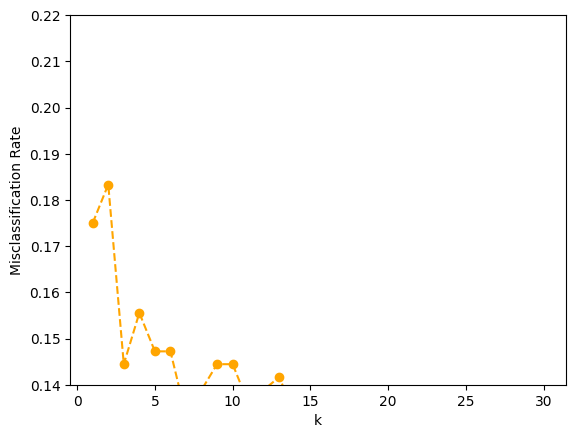

In [77]:
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

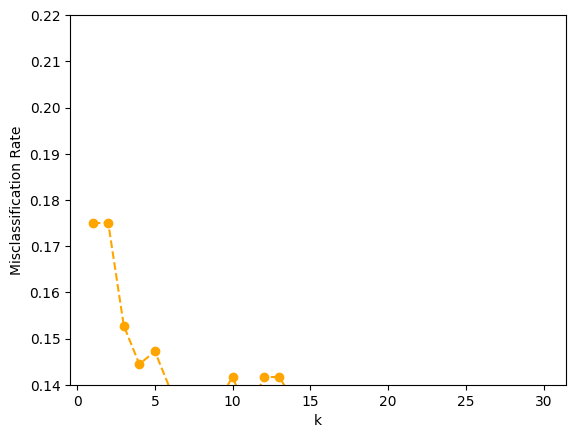

In [78]:
k_num = range(1,31)

accuracies = []
for k in k_num:
  k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
  k_num_model_2.fit(x_train, y_train)
  accuracies.append(1 - k_num_model_2.score(x_test, y_test))

plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

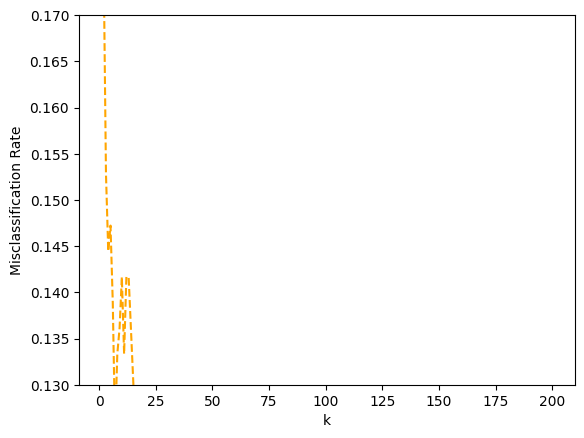

In [79]:
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))
\
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.13, 0.17)
plt.show()

In [80]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,-0.309048,0.226637
1,0.192841,-0.172956
2,-0.243643,-0.017066
3,0.278753,0.131632
4,-0.046247,-0.148506


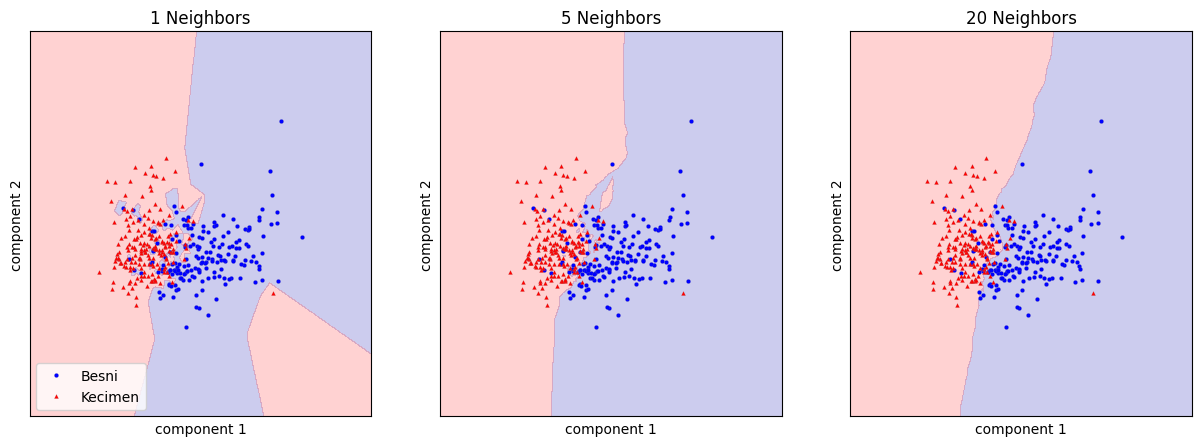

In [81]:
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for n_neighbors, ax in zip([1, 5, 20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x,
                                    fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1],
                             df_vsl_y, markeredgewidth=0.1,
                             c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))
axes[0].legend(loc=3)

In [ ]:
!pip install pmdarima

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [85]:
df = pd.read_csv("walmart_cleaned.csv")
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3.0,151315.0


In [90]:
df['Date2']= pd.to_datetime(df['Date'])

df = df.sort_values(by='Date2')

df['Year'] = df['Date2'].dt.year

def func(df):
    df_sum = {}
    df_sum['Weekly_Sales'] = df['Weekly_Sales'].sum()
    df_sum['Temperature'] = df['Temperature'].mean()
    df_sum['Fuel_Price'] = df['Fuel_Price'].mean()
    df_sum['IsHoliday'] = df['IsHoliday'].max()
    df_sum['CPI'] = df['CPI'].mean()
    df_sum['Unemployment'] = df['Unemployment'].mean()
    return pd.Series(df_sum, index=['Weekly_Sales', 'Temperature',
                                    'Fuel_Price', 'IsHoliday',
                                    'CPI', 'Unemployment'])

df_agg = df.groupby(['Year', 'Date2']).apply(func).reset_index()

df_agg.head()

,Year,Date2,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
0,2010,2010-02-05,3780680.36,41.250000,2.572,0.0,210.924482,8.215000
1,2010,2010-02-12,3779766.94,38.500000,2.548,1.0,211.070082,8.215000
2,2010,2010-02-19,3736419.71,39.810000,2.514,0.0,211.117152,8.215000
3,2010,2010-02-26,3274824.86,46.363172,2.561,0.0,211.146615,8.215752
4,2010,2010-03-05,3545819.81,46.835000,2.625,0.0,211.178449,8.215000


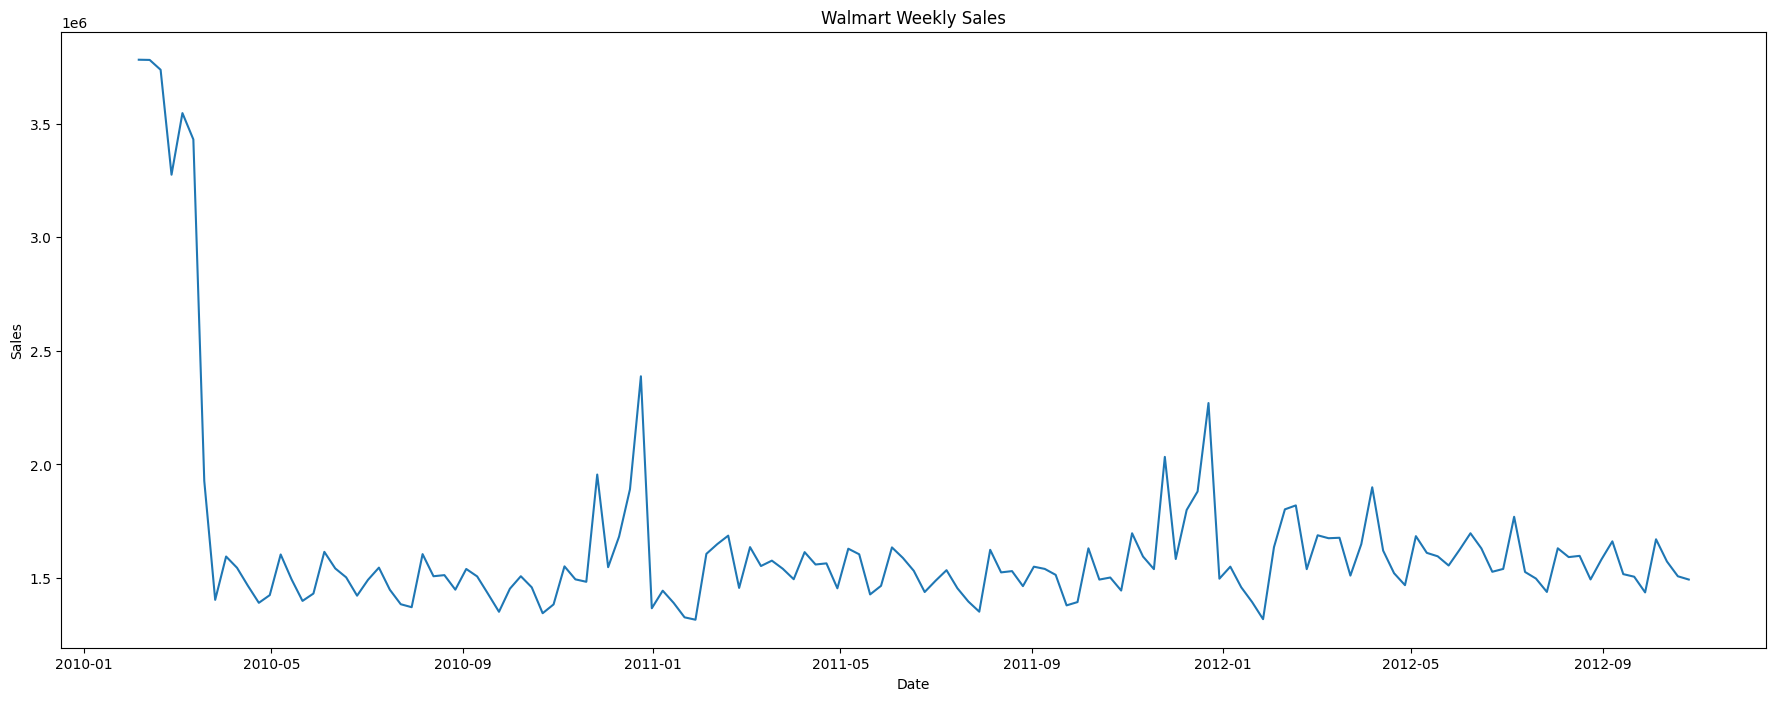

In [91]:
plt.figure(figsize=(22,8))
plt.plot(df_agg.Date2,df_agg.Weekly_Sales)
plt.title("Walmart Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [92]:
timeSeries_decomp = df_agg.loc[:, ["Date2","Weekly_Sales"]]
timeSeries_decomp.index = timeSeries_decomp.Date2
ts_decomp = timeSeries_decomp.drop("Date2",axis=1)

ts_decomp.head()

,Weekly_Sales
Date2,
2010-02-05,3780680.36
2010-02-12,3779766.94
2010-02-19,3736419.71
2010-02-26,3274824.86
2010-03-05,3545819.81


<Figure size 640x480 with 0 Axes>

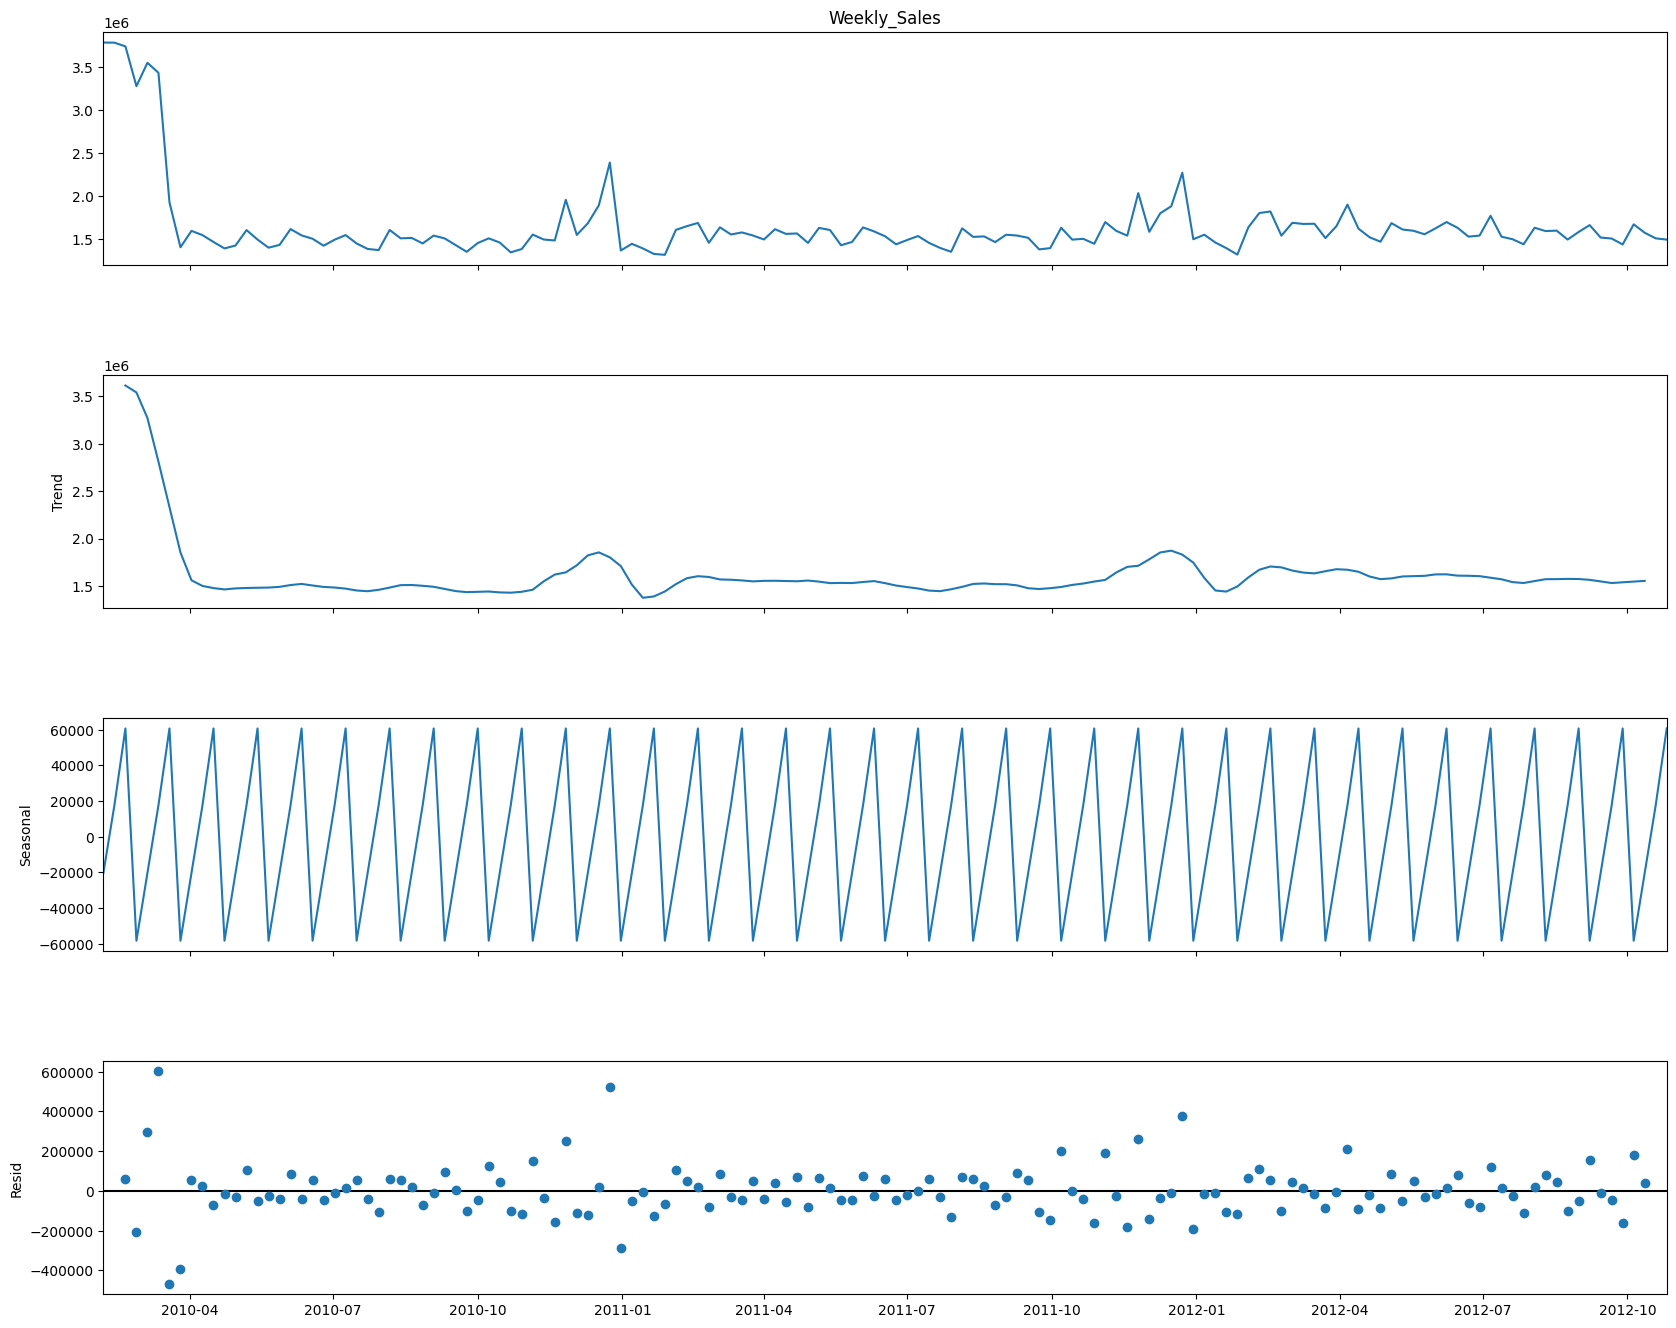

In [93]:
decomp = seasonal_decompose(ts_decomp['Weekly_Sales'], model='additive', period=4)

fig = plt.figure()
fig = decomp.plot()
fig.set_size_inches(20, 15)
plt.show()

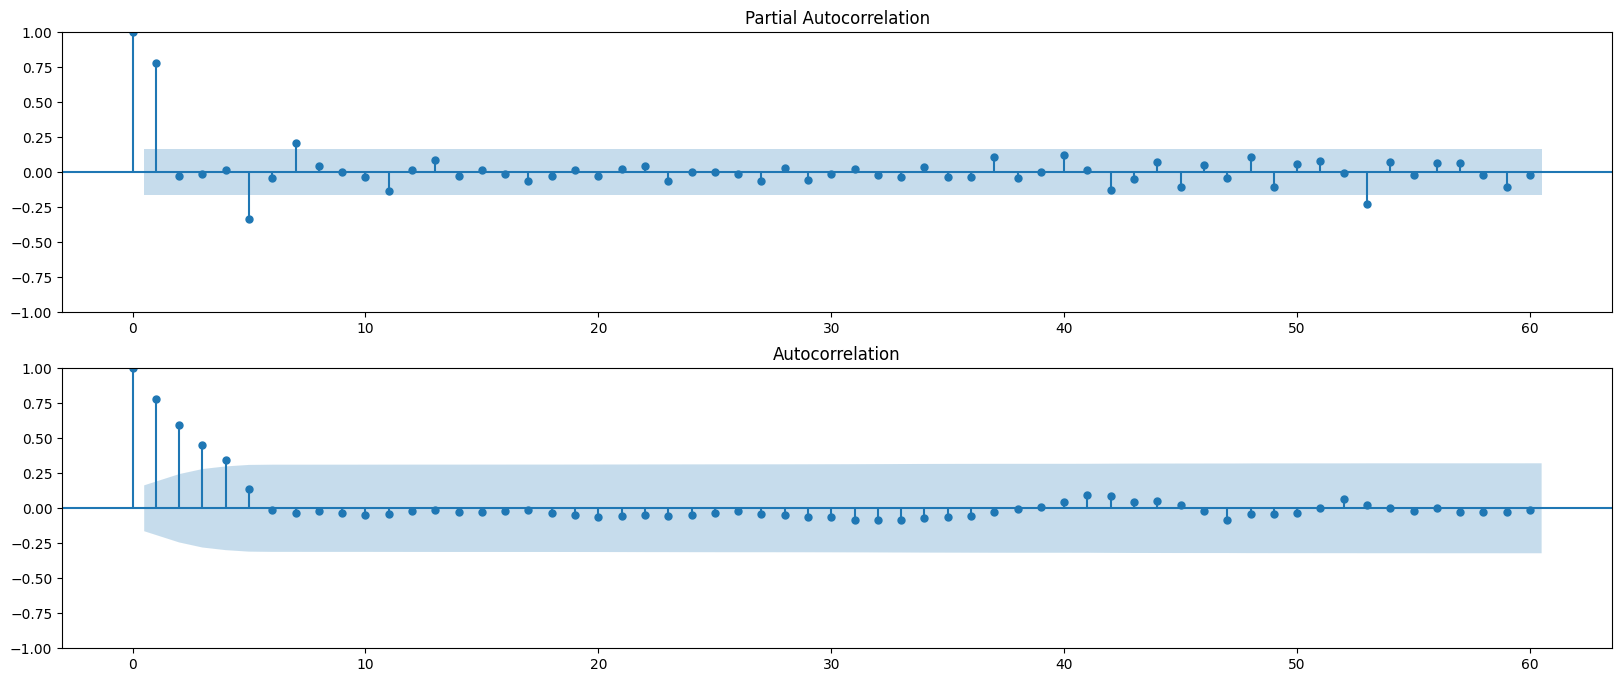

In [94]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_decomp, lags=60, ax=ax1)

ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_decomp, lags=60, ax=ax2)

In [95]:
df_agg['Weekly_Sales_1w'] = df_agg['Weekly_Sales'].shift(1)
df_agg['Weekly_Sales_2w'] = df_agg['Weekly_Sales'].shift(2)
df_agg['Weekly_Sales_3w'] = df_agg['Weekly_Sales'].shift(3)
df_agg['Weekly_Sales_4w'] = df_agg['Weekly_Sales'].shift(4)
df_agg['Weekly_Sales_52w'] = df_agg['Weekly_Sales'].shift(52)

df_agg_set = df_agg[df_agg["Date2"].isin(pd.date_range('2011-02-05', '2012-10-26'))]

df_x = df_agg_set.drop(['Year','Date2','Weekly_Sales'],axis=1)
df_y = df_agg_set[['Weekly_Sales']]

x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=1)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  54
test data 개수:  36


In [96]:
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

y_predict = mreg.predict(x_test)

print("학습셋 R-Square: {:.5f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.5f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.35275
테스트셋 R-Square: 0.20377


In [97]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.344
Date:                Wed, 18 Oct 2023   Prob (F-statistic):             0.0261
Time:                        13:59:25   Log-Likelihood:                -686.34
No. Observations:                  54   AIC:                             1395.
Df Residuals:                      43   BIC:                             1417.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.459e+06      3e+06     -0.819      0.417   -8.51e+06     3.6e+06
Temperature       1105.9782   1299.147      0.851      0.399   -1514.001    3725.957
Fuel_Price        1035.0142   6.91e+04      0.015      0.988   -1.38e+05     1.4e+05
IsHoliday         2.927e+04   5.75e+04      0.509      0.614   -8.68e+04    1.45e+05
CPI               1.259e+04   1.11e+04      1.133      0.264   -9823.868     3.5e+04
Unemployment      5.601e+04   8.12e+04      0.690      0.494   -1.08e+05     2.2e+05
Weekly_Sales_1w      0.1739      0.113      1.540      0.131      -0.054       0.402
Weekly_Sales_2w     -0.0263      0.104     -0.253      0.801      -0.236       0.183
Weekly_Sales_3w     -0.0592      0.099     -0.601      0.551      -0.258       0.139
Weekly_Sales_4w      0.3007      0.121      2.495      0.017       0.058       0.544
Weekly_Sales_52w     0.0939      0.034      2.746      0.009       0.025       0.163
==============================================================================
Omnibus:                       10.377   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.784
Skew:                           0.749   Prob(JB):                      0.00276
Kurtosis:                       4.730   Cond. No.                     8.79e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
! pip install yellowbrick

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


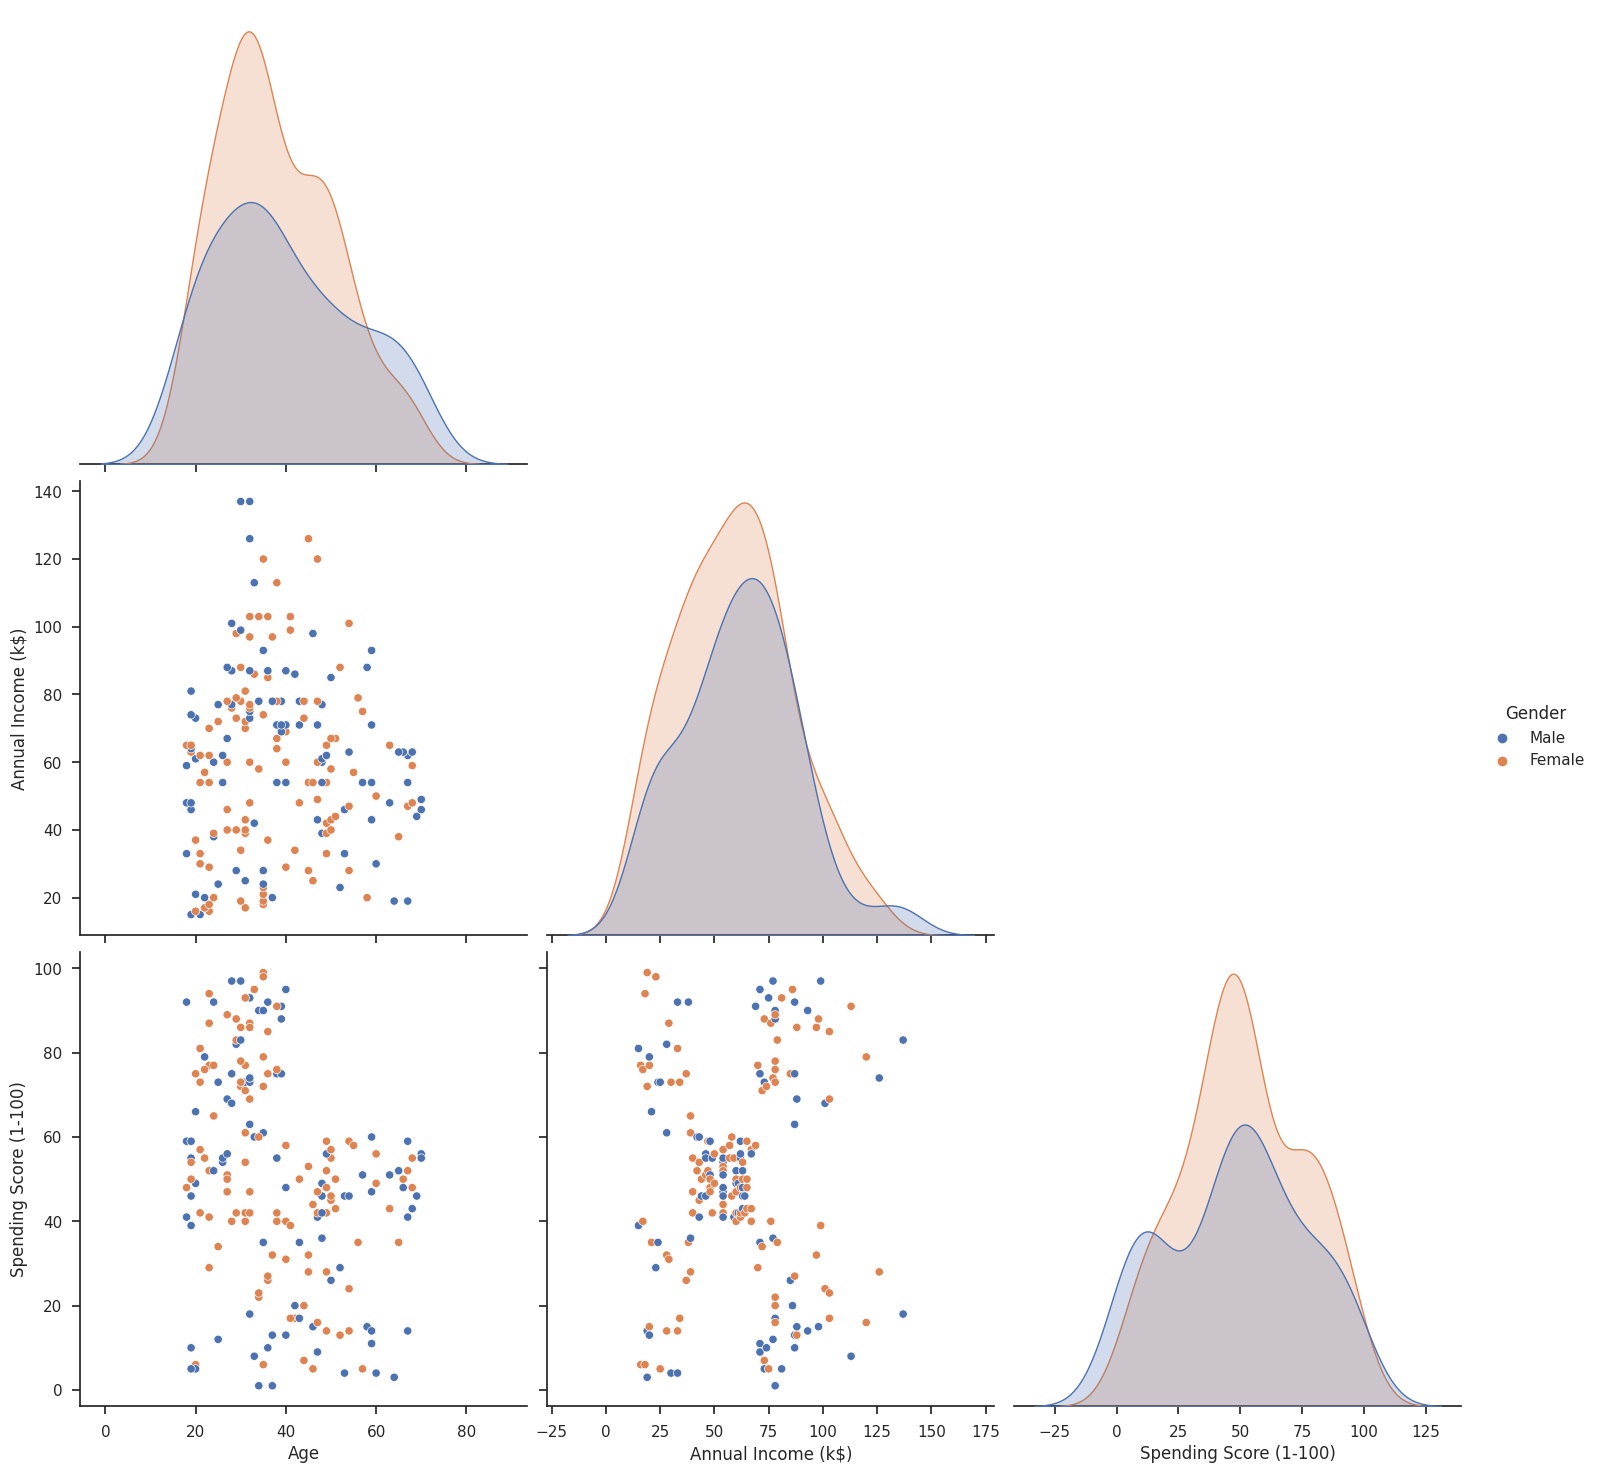

In [101]:
df1 = df.drop('CustomerID', axis=1)

sns.set(font_scale=1)
sns.set_style('ticks')
sns.pairplot(df1,
             diag_kind='kde',
             hue = 'Gender',
             corner=True,
             height = 5
            )
plot_kws={"s": 100}

plt.show()

In [102]:
df2 = pd.get_dummies(df1, columns = ['Gender'],drop_first=True)

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df2)

df_minmax = pd.DataFrame(data=df_minmax, columns=df2.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [103]:
kmeans_model_1 = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=37
)

kmeans_model_1.fit(df_minmax)

print(kmeans_model_1.inertia_)

print(kmeans_model_1.cluster_centers_)

print(kmeans_model_1.n_iter_)

29.552857611943857
[[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]
 [1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]]
2


<Axes: >

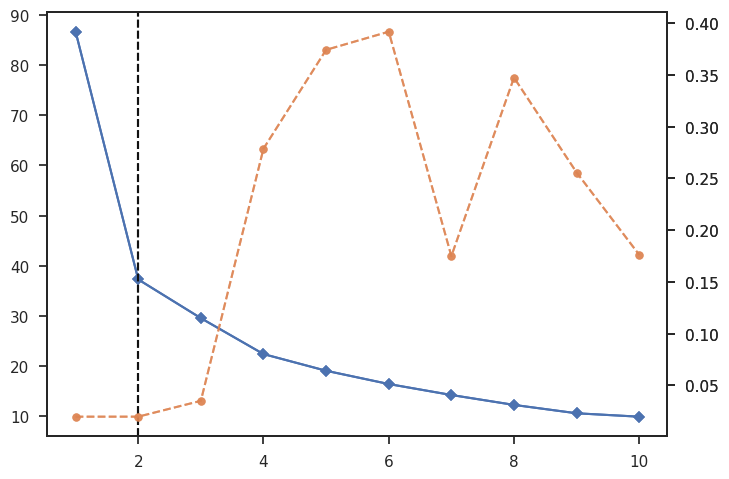

In [104]:
Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1,11),)
Elbow_Chart.fit(df_minmax)
Elbow_Chart.draw()

<ipython-input-105-8a933679956c>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


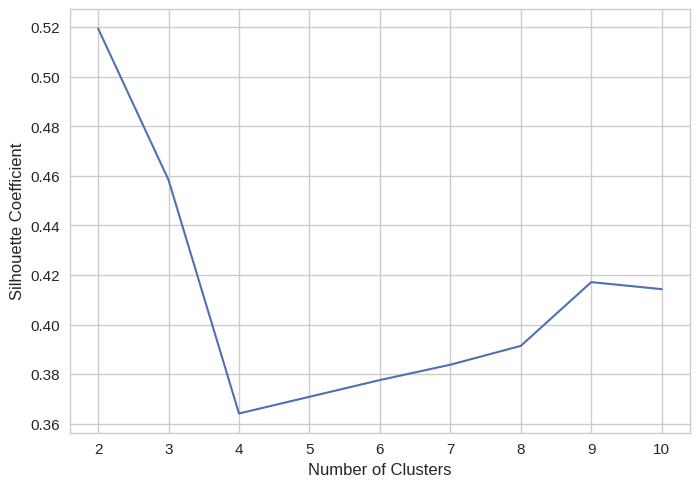

In [105]:
kmeans_model_2 = {
       "init": "k-means++",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 37,
        }

silhouette_coef = []

for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, kmeans_silhouette.labels_)
    silhouette_coef.append(score)

plt.style.use('seaborn-whitegrid')
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

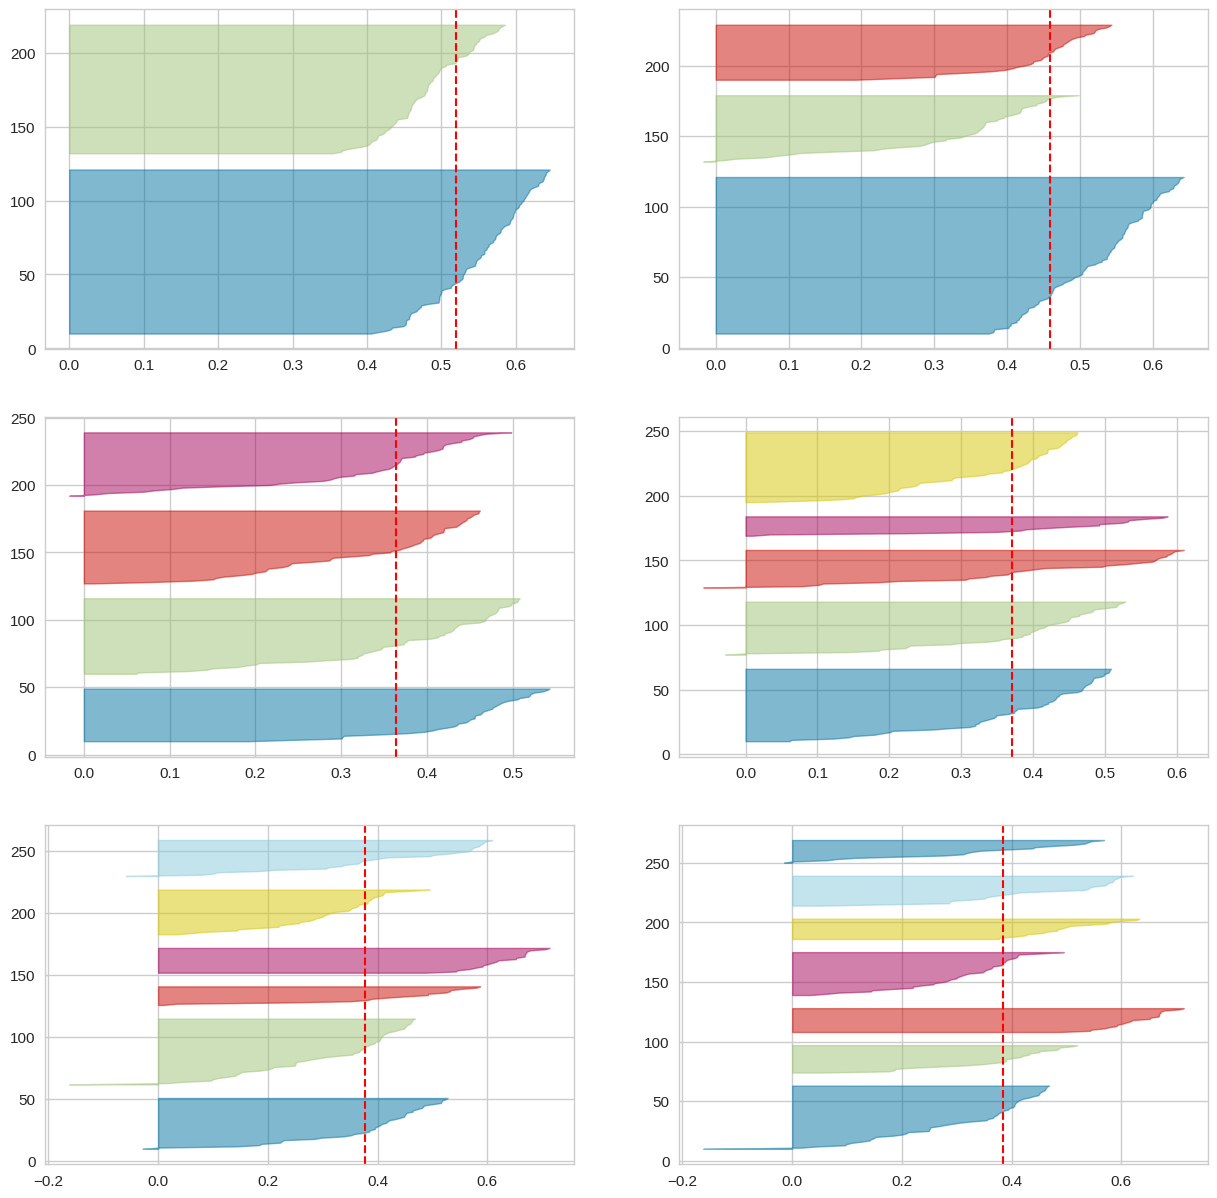

In [106]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:

    kmeans_model_3 = KMeans(n_clusters=i,
                            init="k-means++",
                            n_init=10,
                            max_iter=300,
                            random_state=37)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmeans_model_3,
                                      colors="yellowbrick",
                                      ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

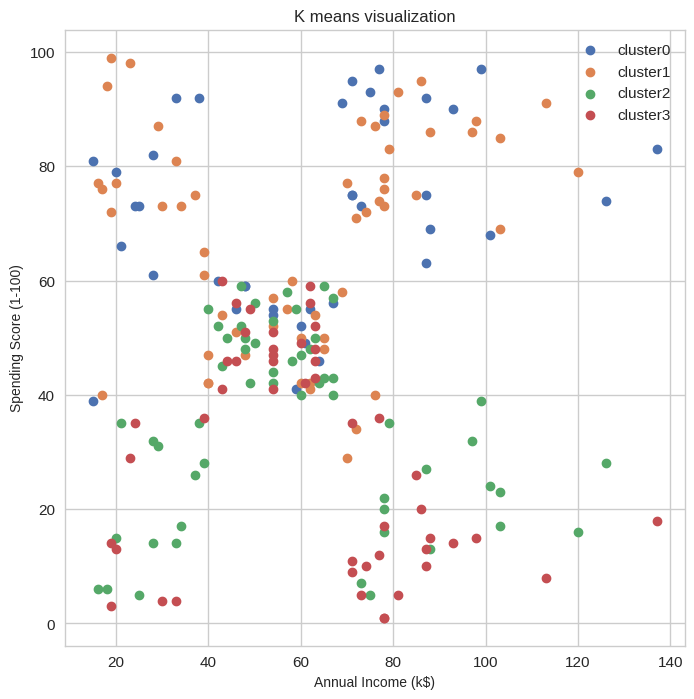

In [107]:
kmeans_model_4 = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=37)

df2['cluster1'] = kmeans_model_4.fit_predict(df_minmax)

plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster1'].max() + 1):
    plt.scatter(df2.loc[df2['cluster1'] == i,
                        'Annual Income (k$)'],
                df2.loc[df2['cluster1'] == i,
                        'Spending Score (1-100)'],
                label = 'cluster'+str(i))

plt.legend()
plt.title('K means visualization', size = 12)
plt.xlabel('Annual Income (k$)', size = 10)
plt.ylabel('Spending Score (1-100)', size = 10)
plt.show()

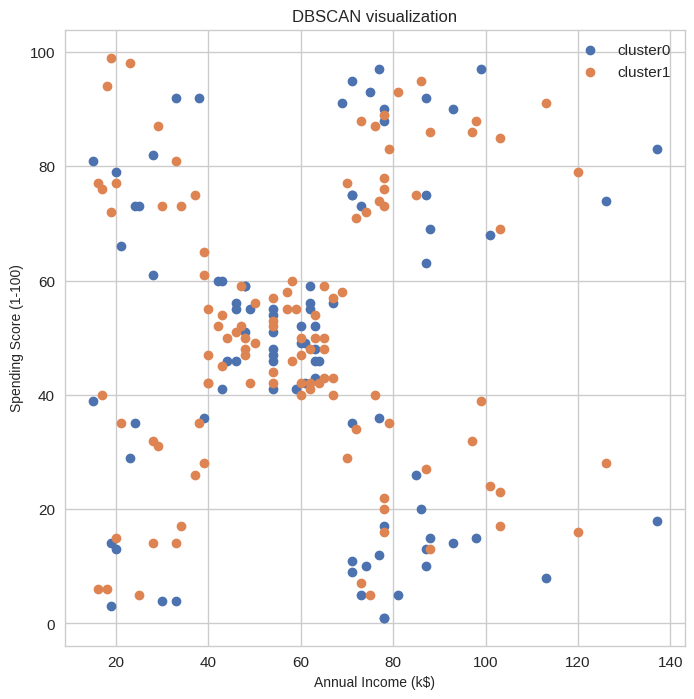

In [108]:
DBSCAN_model = DBSCAN(eps=0.7, min_samples=5)

DBSCAN_model.fit(df_minmax)
df2['cluster2'] = DBSCAN_model.fit_predict(df_minmax)

plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster2'].max() + 1):
    plt.scatter(df2.loc[df2['cluster2'] == i,
                        'Annual Income (k$)'],
                df2.loc[df2['cluster2'] == i,
                        'Spending Score (1-100)'],
                    label = 'cluster'+str(i))

plt.legend()
plt.title('DBSCAN visualization', size = 12)
plt.xlabel('Annual Income (k$)', size = 10)
plt.ylabel('Spending Score (1-100)', size = 10)
plt.show()

In [109]:
df_kmeans = df2.groupby(['cluster1']).agg({'Age':'mean',
                                          'Annual Income (k$)':'mean',
                                          'Spending Score (1-100)':'mean',
                                          'Gender_Male':'mean'
                                          }).reset_index()

df_kmeans['cnt'] = df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,28.250000,62.000000,71.675000,1.0,40
1,1,28.438596,59.666667,67.684211,0.0,57
2,2,48.109091,58.818182,34.781818,0.0,55
3,3,49.437500,62.416667,29.208333,1.0,48


In [110]:
df_DBSCAN = df2.groupby(['cluster2']).agg({'Age':'mean',
                                          'Annual Income (k$)':'mean',
                                          'Spending Score (1-100)':'mean',
                                          'Gender_Male':'mean'}).reset_index()

df_DBSCAN['cnt'] = df2.groupby('cluster2')['Age'].count()
df_DBSCAN.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112


In [111]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import numpy as np

In [112]:
df = pd.read_csv("market_basket.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cust_cd,std_dt,prdct_cd,prdct_nm
0,C617077280704,2021-06-19,A10001,tropical fruit
1,C617077280704,2021-06-19,A10002,whole milk
2,C617077280704,2021-06-19,A10003,pip fruit
3,C617077280704,2021-06-19,A10004,other vegetables
4,C617077280704,2021-06-19,A10005,cream


In [113]:
itemset = df.drop_duplicates(
    ['cust_cd', 'std_dt', 'prdct_nm']).groupby(
    ['cust_cd','std_dt'])['prdct_nm'].apply(list)

itemset= pd.DataFrame(itemset).reset_index().drop(
    ['cust_cd', 'std_dt'], axis='columns')

itemset = itemset.squeeze()

itemset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    [beef, herbs, tropical fruit, whole milk, chic...
1    [sugar, packaged fruit/vegetables, sausage, sp...
2    [berries, tropical fruit, fruit/vegetable juic...
3    [yogurt, beef, cream, herbs, chicken, bottled ...
4    [berries, beef, yogurt, specialty bar, bottled...
Name: prdct_nm, dtype: object

In [114]:
encoder = TransactionEncoder()
encoder_T = encoder.fit(itemset).transform(itemset)

itemset_matrix = pd.DataFrame(encoder_T, columns=encoder.columns_)

itemset_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,canned beer,chicken,...,sparkling wine,specialty bar,specialty chocolate,sugar,syrup,tropical fruit,turkey,white wine,whole milk,yogurt
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,True,True,False,False,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [115]:
itemset_apriori = apriori(itemset_matrix, min_support=0.01, use_colnames=True)
itemset_apriori.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.166612,(beef)
1,0.105074,(berries)
2,0.017010,(beverages)
3,0.025754,(bottled beer)
4,0.095191,(bottled water)


In [116]:
association_rules(itemset_apriori, metric="lift", min_threshold=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(ham, beef)",(bottled water),0.028179,0.095191,0.014585,0.517601,5.437508,0.011903,1.875645,0.839756
1,(bottled water),"(ham, beef)",0.095191,0.028179,0.014585,0.153223,5.437508,0.011903,1.147670,0.901950
2,"(yogurt, beef)",(bottled water),0.023844,0.095191,0.011977,0.502311,5.276885,0.009707,1.818022,0.830291
3,(bottled water),"(yogurt, beef)",0.095191,0.023844,0.011977,0.125820,5.276885,0.009707,1.116654,0.895763
4,"(cream, beef, pastry)",(bottled water),0.030163,0.095191,0.014879,0.493301,5.182229,0.012008,1.785693,0.832132
5,"(cream, beef)","(pastry, bottled water)",0.069878,0.037474,0.014879,0.212934,5.682200,0.012261,1.222929,0.885918
6,"(cream, bottled water)","(beef, pastry)",0.047797,0.046916,0.014879,0.311299,6.635276,0.012637,1.383887,0.891922
7,"(beef, pastry)","(cream, bottled water)",0.046916,0.047797,0.014879,0.317150,6.635276,0.012637,1.394453,0.891097
8,"(pastry, bottled water)","(cream, beef)",0.037474,0.069878,0.014879,0.397059,5.682200,0.012261,1.542642,0.856093
9,(bottled water),"(cream, beef, pastry)",0.095191,0.030163,0.014879,0.156310,5.182229,0.012008,1.149519,0.891937


In [117]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")

df_ratings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [119]:
df_merge = pd.merge(df_ratings, df_movies, on="movieId")

df_merge_pivot = df_merge.pivot_table("rating", "userId", "title")

df_merge_pivot_null = df_merge_pivot.fillna(0)

df_merge_pivot_T = df_merge_pivot_null.T
df_merge_pivot_T.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
item_sim = cosine_similarity(df_merge_pivot_T)

item_sim_df = pd.DataFrame(item_sim, index=df_merge_pivot_T.index,
                           columns=df_merge_pivot_T.index)

item_sim_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.342682,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.158272,0.0,0.098324,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.147486,0.0
'Round Midnight (1986),0.0,0.0,1.0,0.0,0.0,0.0,0.081094,0.000000,0.257012,0.680414,...,0.000000,0.227429,0.141421,0.0,0.100219,0.0,0.221581,0.0,0.098324,1.0
'Til There Was You (1997),0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,1.0,0.0,0.031610,0.231897,0.100923,0.000000,...,0.057358,0.000000,0.000000,0.0,0.212684,0.0,0.104192,0.0,0.161820,0.0


In [121]:
item_sim_df["(500) Days of Summer (2009)"].sort_values(ascending=False)[1:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title
Scott Pilgrim vs. the World (2010)    0.502121
Up in the Air (2009)                  0.498354
Social Network, The (2010)            0.497004
Forgetting Sarah Marshall (2008)      0.472271
Shutter Island (2010)                 0.468202
Name: (500) Days of Summer (2009), dtype: float64

In [122]:
user_sim = cosine_similarity(df_merge_pivot_null)

user_sim_df = pd.DataFrame(user_sim, index=df_merge_pivot_null.index,
                           columns=df_merge_pivot_null.index)

user_sim_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153493
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064822
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109658
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157809
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068281


In [123]:
user_sim_df[7].sort_values(ascending=False)[1:6]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


userId
403    0.432287
358    0.414600
228    0.396949
328    0.391268
590    0.387817
Name: 7, dtype: float64

In [124]:
K=30

df_merge_sample = df_merge_pivot.iloc[:,0:30]
df_array = df_merge_sample.values
user_cnt, item_cnt = df_array.shape

np.random.seed(47)
user_matrix = np.random.normal(scale=1./K, size=(user_cnt, K))
item_matrix = np.random.normal(scale=1./K, size=(item_cnt, K))

print("고객 행렬 확인:", user_matrix.shape)
print("영화 행렬 확인:", item_matrix.shape)

고객 행렬 확인: (668, 30)
영화 행렬 확인: (30, 30)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
def get_rmse(df_array, user_matrix, item_matrix, not_nan_index):
    error = 0

    pred_rating_matrix = user_matrix @ item_matrix.T

    df_array_not_null = df_array[not_nan_index]
    pred_rating_matrix_not_null = pred_rating_matrix[not_nan_index]

    mse = mean_squared_error(df_array_not_null, pred_rating_matrix_not_null)
    rmse = np.sqrt(mse)

    return rmse

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
def matrix_factorization(df_array, K, steps=1000,
                         learning_rate=0.01, r_lambda = 0.01):

    not_nan_index = np.where(np.isnan(df_array) == False)

    for step in range(steps):
        for p, q, r in zip(not_nan_index[0], not_nan_index[1]
                           ,df_array[not_nan_index]):

            r_pq = user_matrix[p, :] @ item_matrix[q, :].T
            error_pq = r - r_pq

            user_matrix[p,:] = user_matrix[p,:] + learning_rate*(
                error_pq * item_matrix[q, :] - r_lambda*user_matrix[p,:])

            item_matrix[q,:] = item_matrix[q,:] + learning_rate*(
                error_pq * user_matrix[p, :] - r_lambda*item_matrix[q,:])

        rmse = get_rmse(df_array, user_matrix, item_matrix, not_nan_index)

        if ( (step + 1)  % 100) == 0 :
            print("반복 횟수: ", step + 1 ," RMSE: ", np.round(rmse,3))

    return user_matrix, item_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
user_matrix, item_matrix = matrix_factorization(
    df_array, K, steps=1000,
    learning_rate=0.01, r_lambda = 0.01)

pred_matrix = user_matrix @ item_matrix.T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


반복 횟수:  100  RMSE:  0.097
반복 횟수:  200  RMSE:  0.027
반복 횟수:  300  RMSE:  0.024
반복 횟수:  400  RMSE:  0.023
반복 횟수:  500  RMSE:  0.021
반복 횟수:  600  RMSE:  0.02
반복 횟수:  700  RMSE:  0.02
반복 횟수:  800  RMSE:  0.019
반복 횟수:  900  RMSE:  0.019
반복 횟수:  1000  RMSE:  0.018


In [128]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix,
                                   index= df_merge_sample.index,
                                   columns = df_merge_sample.columns)

ratings_pred_matrix.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,"10th Kingdom, The (2000)",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.051631,-0.083938,-0.069660,-0.105834,-0.186691,-0.094306,-0.098581,-0.177139,-0.103241,-0.082794,...,-0.045882,-0.079783,-0.112016,-0.110756,-0.034177,-0.163101,-0.076059,-0.051933,-0.128448,-0.113047
2,0.068995,0.063763,0.029378,0.103909,0.070665,0.035862,0.094289,0.170707,0.130561,0.053904,...,0.134833,0.066054,0.067439,0.097416,0.013622,0.127945,-0.041964,0.049973,0.106233,0.082817
3,0.128438,0.089740,0.090381,0.066533,0.103108,0.031881,0.212484,0.048289,0.182902,0.070970,...,0.142718,0.191402,0.256842,0.230997,0.064861,0.149501,-0.003335,0.198401,0.207483,0.198376
4,2.895991,1.712282,1.787002,2.657818,2.820935,2.213617,2.082815,2.555981,3.306608,2.252366,...,1.648483,1.936613,2.729978,2.677794,1.100380,4.981980,0.620007,2.018014,3.723871,2.951902
5,0.001853,0.076697,-0.039216,-0.029270,-0.007633,-0.051874,-0.026496,0.004058,0.040571,-0.024389,...,0.042998,0.052845,0.024583,0.030629,-0.026081,-0.008237,0.040031,0.000849,0.007089,-0.021943


In [129]:
def get_unseen_movies(df_merge_sample, userId):

    movies_list = df_merge_sample.columns.tolist()

    ratings = df_merge_sample.loc[userId,:]

    none_rating_list = ratings[ratings.isnull()].index.tolist()

    unseen_movie_list = [ movie for movie in movies_list if movie in none_rating_list]

    return unseen_movie_list

def recomm_movie_by_userid(pred_df, userId, unseen_movie_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_movie_list
                               ].sort_values(ascending=False)[:top_n]

    return recomm_movies

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
unseen_movie_list = get_unseen_movies(df_merge_sample, 575)

recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 575
                                       ,unseen_movie_list, top_n=10)

recomm_movies = pd.DataFrame(data=recomm_movies.values,
                             index=recomm_movies.index,
                             columns=['pred_score']).reset_index()

recomm_movies.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,pred_score
0,12 Years a Slave (2013),3.569347
1,127 Hours (2010),3.362532
2,101 Dalmatians (One Hundred and One Dalmatians...,2.968062
3,10 Items or Less (2006),2.949394
4,11:14 (2003),2.884700
5,"11th Hour, The (2007)",2.742791
6,*batteries not included (1987),2.701928
7,'71 (2014),2.672483
8,12 Rounds (2009),2.585290
9,10th & Wolf (2006),2.489459


In [133]:
!pip install tensorflow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
import sys
from sklearn.preprocessing import MinMaxScaler
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

(x_train, y_train), (x_test, y_test) = (x_train[:10000], y_train[:10000]
                                       ), (x_test[:10000], y_test[:10000])

input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float') / 255.
x_test = x_test.astype('float') / 255.

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


x_train shape: (10000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/5
264/264 [==============================] - 47s 172ms/step - loss: 0.1105 - accuracy: 0.8062 - val_loss: 0.0296 - val_accuracy: 0.9568
Epoch 2/5
264/264 [==============================] - 37s 140ms/step - loss: 0.0319 - accuracy: 0.9554 - val_loss: 0.0194 - val_accuracy: 0.9712
Epoch 3/5
264/264 [==============================] - 29s 110ms/step - loss: 0.0224 - accuracy: 0.9703 - val_loss: 0.0146 - val_accuracy: 0.9774
Epoch 4/5
264/264 [==============================] - 22s 83ms/step - loss: 0.0191 - accuracy: 0.9756 - val_loss: 0.0127 - val_accuracy: 0.9794
Epoch 5/5
264/264 [==============================] - 19s 74ms/step - loss: 0.0150 - accuracy: 0.9798 - val_loss: 0.0117 - val_accuracy: 0.9806
Test accuracy: 0.9805999994277954
313/313 [==============================] - 4s 13ms/step


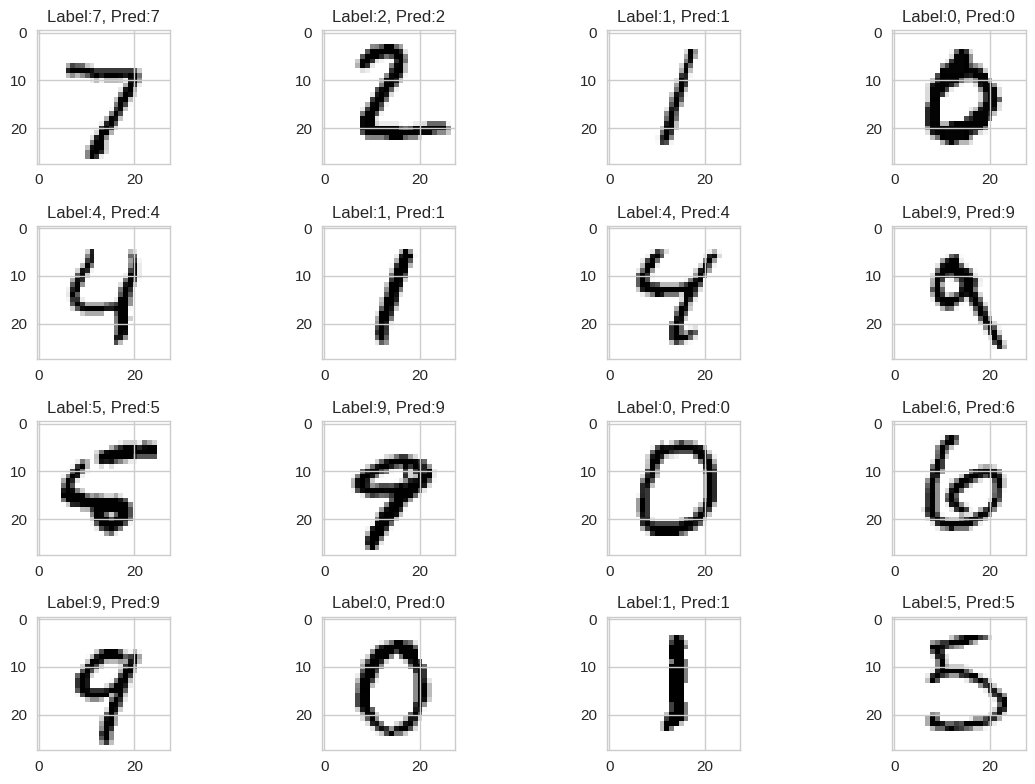

In [137]:
model_fit = model.fit(x_train, y_train, batch_size=38, epochs=5, verbose=1
                      , validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test accuracy:', score[1])

pred_test = model.predict(x_test)
pred_test_y = np.argmax(pred_test, axis=1)
test_y = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='binary', interpolation='nearest')
    sample_result = "Label:" + str(test_y[n]) + ", Pred:" + str(pred_test_y[n])
    plt.title(sample_result)
plt.tight_layout()

plt.show()

In [139]:
df_train = pd.read_csv("Google_Stock_Price_Train.csv")
df_test = pd.read_csv("Google_Stock_Price_Test.csv")
df_train.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [140]:
df_train_array = df_train.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range = (0,1))
df_train_array_scaled = scaler.fit_transform(df_train_array)

x_train = []
y_train = []
for i in range(60, 1258):

    x_train.append(df_train_array_scaled[i-60:i, 0])
    y_train.append(df_train_array_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1198, 60, 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
RL_model = Sequential()
epochs = 100
batch_size = 28

RL_model.add(LSTM( units = 50,
                  return_sequences = True, input_shape = (x_train.shape[1], 1) ))

RL_model.add(Dropout(0.2))

RL_model.add(LSTM(units = 50, return_sequences = True))
RL_model.add(Dropout(0.2))

RL_model.add(LSTM(units = 50, return_sequences = True))
RL_model.add(Dropout(0.2))

RL_model.add(LSTM(units = 50))
RL_model.add(Dropout(0.2))

RL_model.add(Dense(units = 1))

RL_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

RL_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
43/43 [==============================] - 17s 116ms/step - loss: 0.0300
Epoch 2/100
43/43 [==============================] - 5s 122ms/step - loss: 0.0062
Epoch 3/100
43/43 [==============================] - 6s 137ms/step - loss: 0.0056
Epoch 4/100
43/43 [==============================] - 5s 114ms/step - loss: 0.0045
Epoch 5/100
43/43 [==============================] - 6s 145ms/step - loss: 0.0048
Epoch 6/100
43/43 [==============================] - 5s 114ms/step - loss: 0.0049
Epoch 7/100
43/43 [==============================] - 6s 136ms/step - loss: 0.0041
Epoch 8/100
43/43 [==============================] - 5s 123ms/step - loss: 0.0045
Epoch 9/100
43/43 [==============================] - 5s 115ms/step - loss: 0.0046
Epoch 10/100
43/43 [==============================] - 6s 145ms/step - loss: 0.0042
Epoch 11/100
43/43 [==============================] - 5s 114ms/step - loss: 0.0041
Epoch 12/100
43/43 [==============================] - 6s 146ms/step - loss: 0.0040
Epoch 13/100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 2s 2s/step


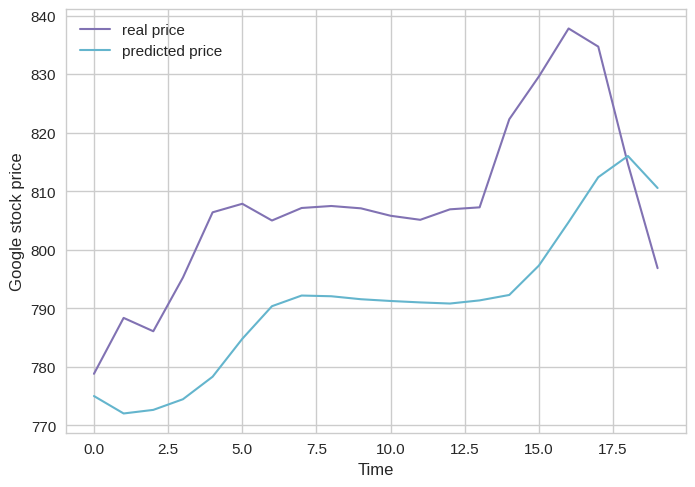

In [142]:
df_test_array = df_test.iloc[:, 1:2].values

dataset_total = pd.concat( (df_train['Open'], df_test['Open']), axis = 0 )

y_test = dataset_total[len(dataset_total) - len(df_test) - 60:].values

y_test = y_test.reshape(-1, 1)

y_test = scaler.transform(y_test)

x_test = []
for i in range(60, 80):
    x_test.append(y_test[i-60:i, 0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = RL_model.predict(x_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

plt.plot(df_test_array, color = 'm', label = 'real price')
plt.plot(predicted_stock_price, color = 'c', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()